<a href="https://colab.research.google.com/github/RabHuss/MY-PROJECTS-/blob/main/AI_Bootcamp2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:

df = pd.read_csv('heart_disease_uci.csv')


print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [ ]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [ ]:

print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [ ]:

print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [ ]:

print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:

potential_targets = []
for column in df.columns:
    if df[column].nunique() == 2:  # Checking if the column has 2 unique values (e.g., 0 and 1)
        potential_targets.append(column)

print(f"Potential target columns: {potential_targets}")

Potential target columns: ['sex', 'fbs', 'exang']


In [ ]:

from sklearn.preprocessing import LabelEncoder


labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['fbs'] = labelencoder.fit_transform(df['fbs'])
df['exang'] = labelencoder.fit_transform(df['exang'])
df['dataset'] = labelencoder.fit_transform(df['dataset'])
df['cp'] = labelencoder.fit_transform(df['cp'])
df['restecg'] = labelencoder.fit_transform(df['restecg'])
df['thal'] = labelencoder.fit_transform(df['thal'])
df['slope'] = labelencoder.fit_transform(df['slope'])

In [ ]:


X = df.drop('exang', axis=1)
y = df['exang']

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Let's assume 'data' is your dataset loaded as a pandas DataFrame
# X_train should contain your feature columns, y_train your target

# Example column names for numeric and categorical features
numeric_features = ['age', 'chol', 'trestbps']  # Example numeric columns
categorical_features = ['slope', 'cp']  # Example categorical columns

# Define transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessor to the dataset
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Fit the model with the preprocessed data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

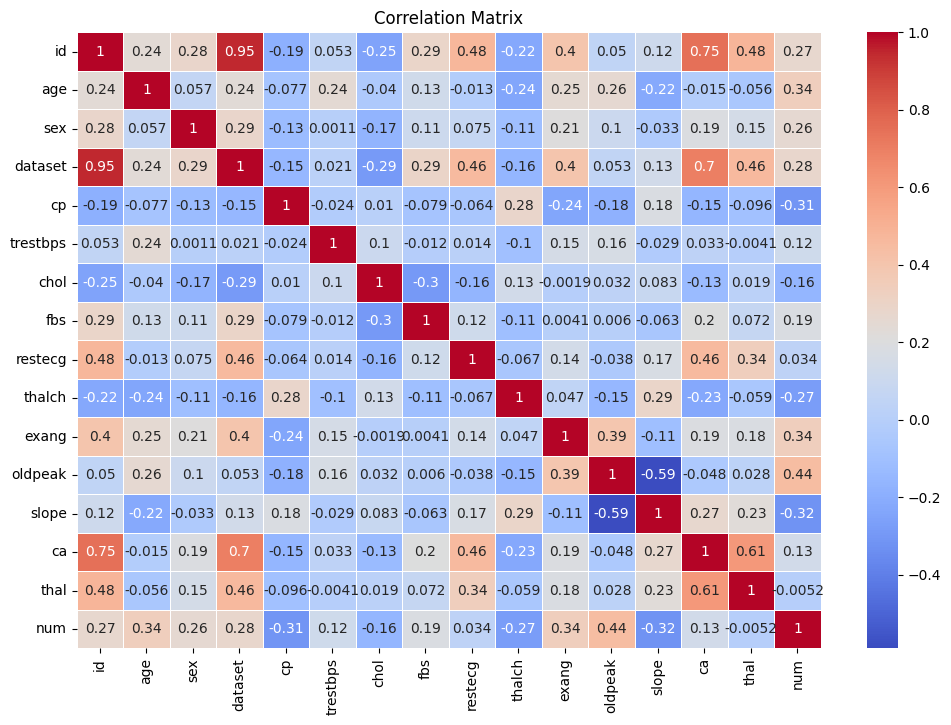

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
correlation_matrix = df.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:


X_test_preprocessed = preprocessor.transform(X_test)

y_pred = model.predict(X_test_preprocessed)

submission_df = pd.DataFrame({
    'id': X_test['id'],   # Make sure 'id' column exists in your test data
    'exang': y_pred
})


submission_df.to_csv('submission.csv', index=False)


print(submission_df.head())

      id  exang
319  320      0
377  378      0
538  539      1
296  297      1
531  532      0
